# Proyek Analisis Data: [PRSA_Data_Aotizhongxin_20130301-20170228]
- Nama: [Putri Andani]
- Email: [putryandanii14@gmail.com]
- ID Dicoding: [putriandani]

## Menentukan Pertanyaan bisnis

- Bagaimana pola polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai bulan atau sepanjang tahun?
- Bagaimana suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) berkorelasi dengan tingkat polutan udara?
- Bagaimana Kualitas Udara pada tahun 2013 - 2017 berdasarkan frekuensi PM2.5

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering data

In [2]:
# membaca data yang telah diunduh
df = pd.read_csv("PRSA_Data_Aotizhongxin_20130301-20170228.csv")

In [3]:
# menampilkan 5 data teratas
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [4]:
# menampilkan 5 data terbawah
df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin
35063,35064,2017,2,28,23,19.0,31.0,10.0,79.0,600.0,42.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Aotizhongxin


In [5]:
# menampilkan semple data secara random
df.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
311,312,2013,3,13,23,42.0,45.0,21.0,74.0,800.0,77.0,2.9,1024.1,-5.5,0.0,S,2.3,Aotizhongxin
8639,8640,2014,2,23,23,219.0,301.0,155.0,107.0,4700.0,1.0,2.8,1023.4,-2.5,0.0,NNE,1.4,Aotizhongxin
33815,33816,2017,1,7,23,78.0,78.0,18.0,77.0,1900.0,2.0,1.0,1020.1,-0.5,0.0,SW,0.0,Aotizhongxin
18428,18429,2015,4,7,20,36.0,107.0,5.0,34.0,400.0,77.0,10.4,1023.4,-10.4,0.0,SW,4.0,Aotizhongxin
26441,26442,2016,3,6,17,124.0,324.0,64.0,70.0,2200.0,30.0,10.1,1010.0,-8.6,0.0,ENE,1.1,Aotizhongxin


#### Insight:
- Pada proses ini dikumpulkan data yang akan digunakan serta melihat sekilas data dengan melihat 5 data teratas dann terbawah serta 5 data sempel untuk memahami distribusi awal nilai-nilai polutan dan kondisi cuaca secara keseluruhan.
- Berdasarkan proses ini diketahui bahwa data mencakup periode 2013-2017 dengan pengukuran setiap jam, memberikan dasar yang baik untuk analisis tren polusi udara dari waktu ke waktu.

### Asessing data

In [6]:
# melihat dimensi data
df.shape

(35064, 18)

In [7]:
# melihat informasi data secara keseluruhan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34139 non-null  float64
 6   PM10     34346 non-null  float64
 7   SO2      34129 non-null  float64
 8   NO2      34041 non-null  float64
 9   CO       33288 non-null  float64
 10  O3       33345 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34983 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [8]:
# melihat jumlah missing value pada data
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       925
PM10        718
SO2         935
NO2        1023
CO         1776
O3         1719
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           81
WSPM         14
station       0
dtype: int64

In [9]:
# melihat apakah ada data yang sama
df.duplicated().sum()

0

In [10]:
df.describe(include = "all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34139.000000,34346.000000,34129.000000,34041.000000,33288.000000,33345.000000,35044.000000,35044.000000,35044.000000,35044.000000,34983,35050.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5140,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.773611,110.060391,17.375901,59.305833,1262.945145,56.353358,13.584607,1011.846920,3.123062,0.067421,NaN,1.708496,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.135694,95.223005,22.823017,37.116200,1221.436236,57.916327,11.399097,10.404047,13.688896,0.910056,NaN,1.204071,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,0.000000,NaN,0.900000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,NaN,1.400000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,155.000000,21.000000,82.000000,1500.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,NaN,2.200000,NaN


In [11]:
df["RAIN"]

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
35059    0.0
35060    0.0
35061    0.0
35062    0.0
35063    0.0
Name: RAIN, Length: 35064, dtype: float64

#### Insight:
- Dari proses asessing data diatas dapat dilihat bahwa terdapat missing value pada beberapa variabel dengan jumlah missing value yang cukup banyak pada variabel PM2.5, PM10,SO2, 9NO2, CO, O3  dan missing value yang relatif sedikit pada variabel TEMP, PRES, DEWP, RAIN, wd, WSPM .
- Dapat dilihat pula terdapat range yang tidak wajar antara data pada quartile ke-3 dengan data max nya, hal ini dapat mengindikasikan adanya outlier.
- kemudian pada variabel rain,nilai rata-ratanya hanya 0.067 sementara nilai maximumnya mencapai 72,5 ini dapat mengindikasikan adanya banyak data dengan nilai 0.

### 3. Cleaning Data

In [12]:
# menghapus kolom
df = df.drop(columns = ['station', 'No', 'RAIN'])

#### Insight:
ketiga kolom diatas dihapus karena pada kolom "station" hanya terdapat satu jenis data yaitu Aotizhongxin karena data yang digunakan hanya data yang diambil dari satu sumber station, kemudian untuk kolom "No" dihapus karena tidak memberikan kontribusi dalam analisis data, sementara pada kolom "RAIN" dihapus karena pada kolom tersebut didominasi oleh nilai 0, sebenarnya ini dapat mengindikasikan jarangnya hujan di daerah tersebut sehingga mempengaruhi kondisi cuaca di tempat tersebut

In [13]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,NNW,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,N,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,NNW,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,NW,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,NW,2.4
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,WNW,0.9
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,NW,1.1
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,NNW,1.2


In [14]:
# mengubah type data variabel 'wd' ke numerik
df['wd'] = pd.Categorical(df['wd']).codes

In [15]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,6,4.4
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,3,4.7
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,6,5.6
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,7,3.1
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,7,2.4
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,14,0.9
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,7,1.1
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,6,1.2


In [16]:
# Kolom yang ingin diisi dengan mean
columns_to_fill = ['TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Mengisi NaN dengan mean untuk kolom yang ditentukan
for column in columns_to_fill:
    if column in df.columns:
        mean_value = df[column].mean()  # Hitung mean kolom
        df[column] = df[column].fillna(mean_value)  # Isi NaN dengan mean


#### insight:
proses cleaning dilakukan dengan menggunakan metode imputation fillna() pada variabel dengan missng value yang masih terhitung sedikit yaitu variabel TEMP, PRES, DEWP, RAIN, dan WSPM

In [17]:
# Kolom yang ingin diisi dengan metode interpolasi linear
columns_to_interpolate = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']

# Menggunakan interpolasi spline hanya pada kolom yang dipilih
for column in columns_to_interpolate:
    if column in df.columns:
        df[column] = df[column].interpolate(method='linear')

#### Insight:
kemudian untuk variabel dengan missing value yang sangat banyak digunakan metode interpolasi seperti diatas. pada proses ini digunakan interpolasi linear.

In [18]:
df.isna().sum()

year     0
month    0
day      0
hour     0
PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
wd       0
WSPM     0
dtype: int64

#### Insight:
Setelah melakukan proses cleaning data, seluruh variabel data bebas dari missing value, ini mengindikasikan data siap untuk dianalisis lebih lanjut ke proses EDA

## Exploratory Data Analysis (EDA)

### Outlier

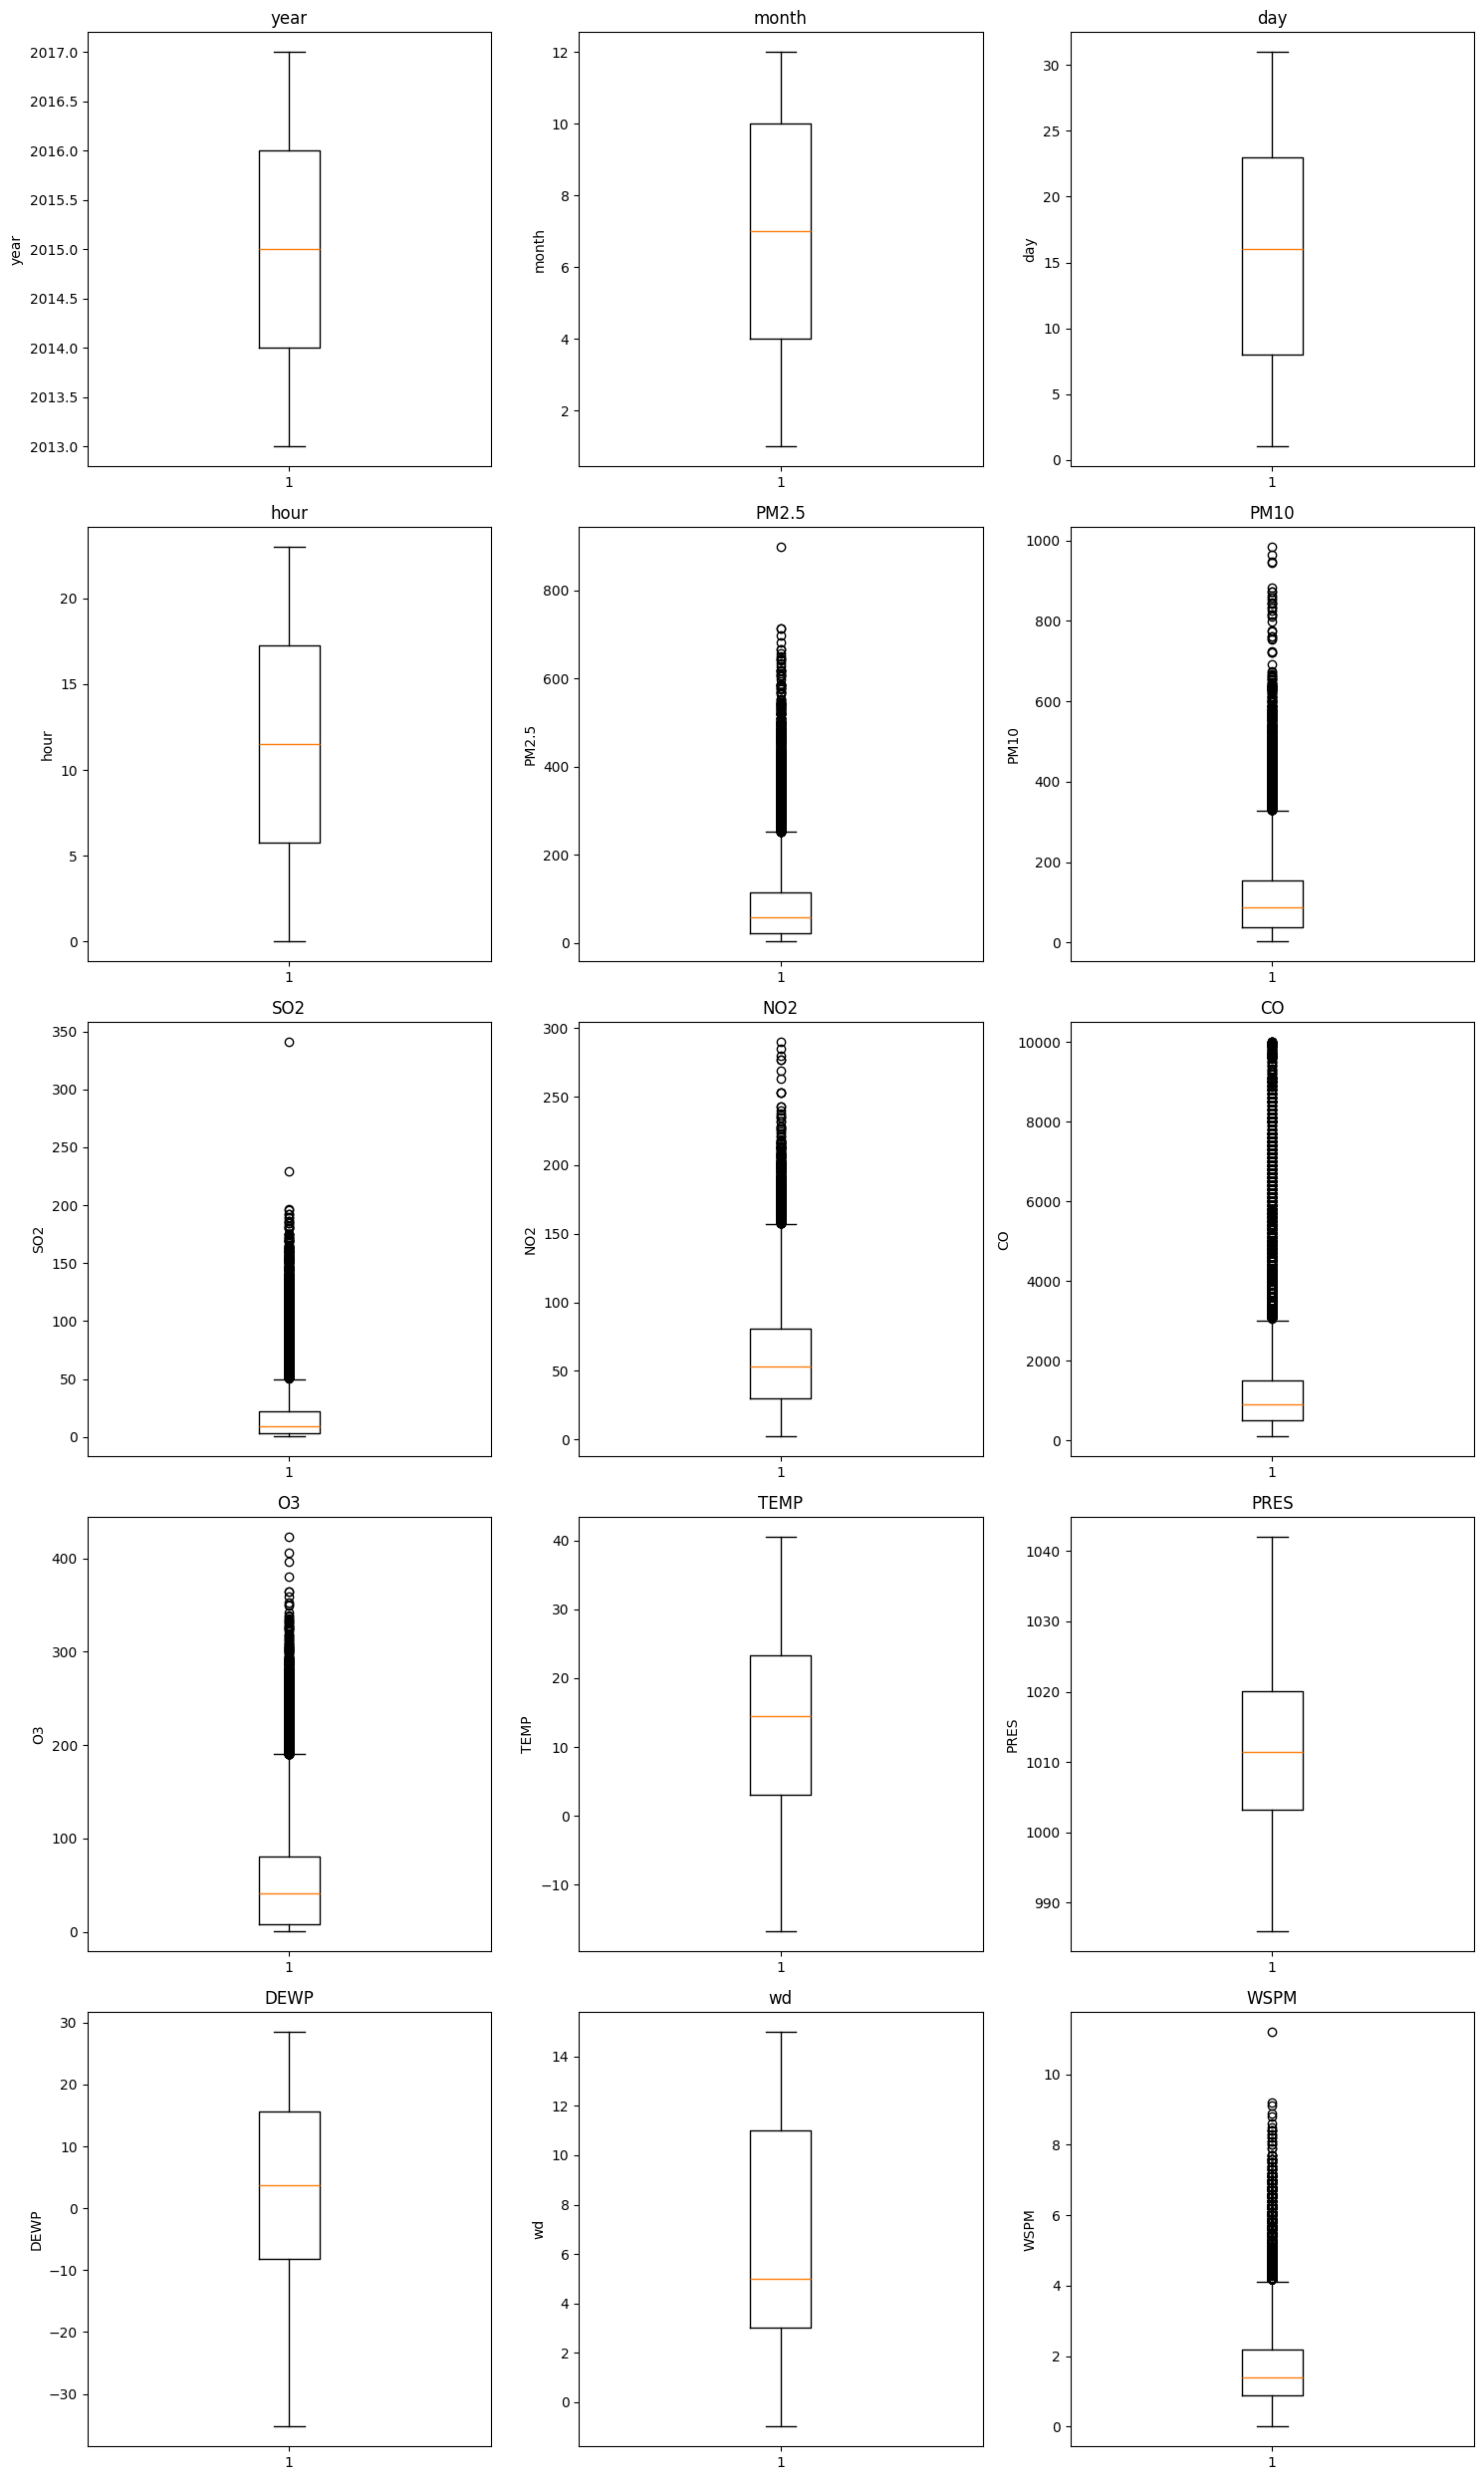

In [19]:
n = len(df.columns)
n_cols = 3  # Jumlah kolom dalam subplot
n_rows = (n // n_cols) + (n % n_cols > 0)  # Jumlah baris yang dibutuhkan

# Membuat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flattening axes array untuk mempermudah iterasi
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Menyembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Agar layout lebih rapi
plt.show()

Untuk mengatasi outlier diatas, diganti nilai outlier dengan nilai ambang batas (upper bound dan lower bound).

In [20]:
for column in ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3','WSPM']:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])


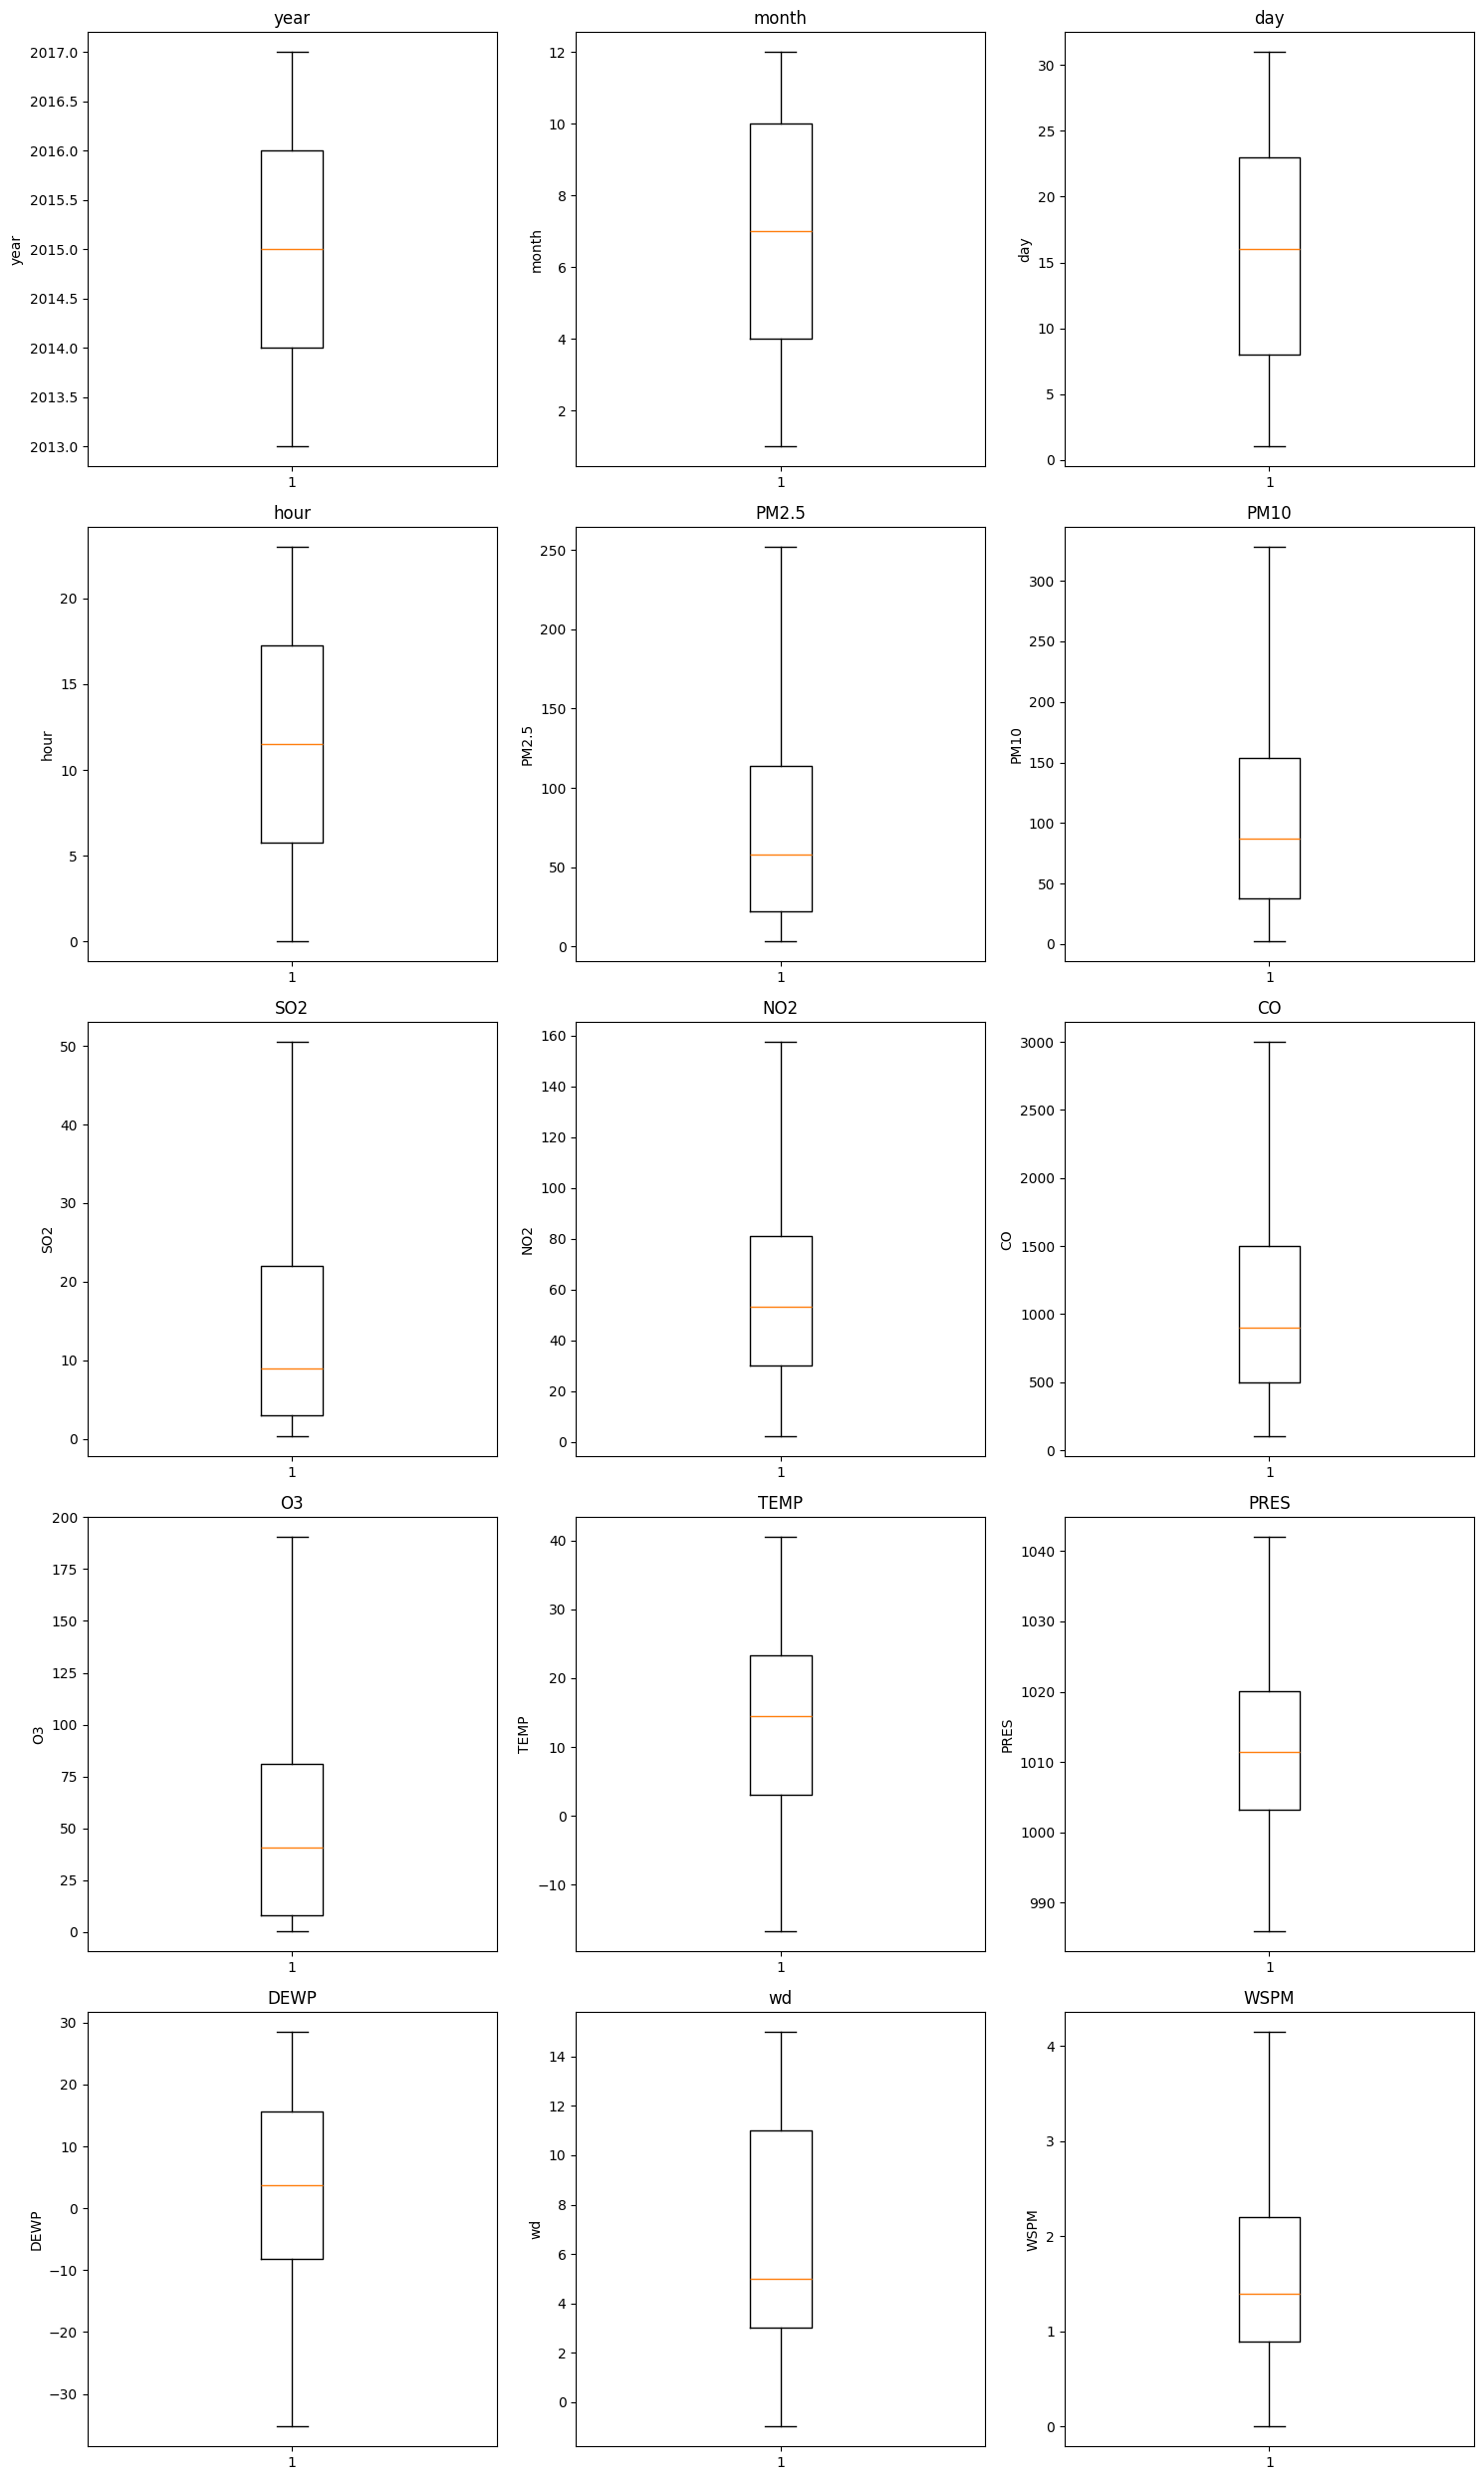

In [21]:
n = len(df.columns)
n_cols = 3  # Jumlah kolom dalam subplot
n_rows = (n // n_cols) + (n % n_cols > 0)  # Jumlah baris yang dibutuhkan

# Membuat figure dan axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flattening axes array untuk mempermudah iterasi
axes = axes.flatten()

# Loop untuk membuat boxplot untuk setiap kolom
for i, col in enumerate(df.columns):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)
    axes[i].set_ylabel(col)

# Menyembunyikan axes yang tidak terpakai
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()  # Agar layout lebih rapi
plt.show()

In [22]:
df.describe(include = 'all')

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,2014.662560,6.522930,15.729637,11.500000,78.725575,107.101446,15.161823,58.704780,1138.740004,53.785977,13.584607,1011.846920,3.123062,6.524184,1.662749
std,1.177213,3.448752,8.800218,6.922285,69.237542,84.087912,15.234358,35.777721,829.967625,52.590212,11.395845,10.401079,13.684991,4.692068,1.070414
min,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,-1.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,8.000000,3.100000,1003.300000,-8.100000,3.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,5.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,114.000000,154.000000,22.000000,81.000000,1500.000000,81.000000,23.300000,1020.100000,15.600000,11.000000,2.200000
max,2017.000000,12.000000,31.000000,23.000000,252.000000,328.000000,50.500000,157.500000,3000.000000,190.500000,40.500000,1042.000000,28.500000,15.000000,4.150000


In [23]:
# melihat korelasi antar variabel
df.corr()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM
year,1.000000e+00,-2.020099e-01,-5.569082e-03,1.164482e-15,-0.047882,-0.091512,-0.195219,-0.117744,0.015724,0.091723,-0.137126,0.232452,-0.197175,-0.060958,0.142118
month,-2.020099e-01,1.000000e+00,1.052232e-02,4.724770e-16,0.011358,-0.028070,-0.242448,0.105667,0.035303,-0.120426,0.130309,-0.005655,0.273095,-0.071956,-0.173235
day,-5.569082e-03,1.052232e-02,1.000000e+00,-4.489555e-17,0.003153,0.029405,-0.010202,0.008516,-0.016962,0.000583,0.014320,0.022532,0.023420,0.002383,-0.012060
hour,1.164482e-15,4.724770e-16,-4.489555e-17,1.000000e+00,-0.011939,0.024527,0.010541,-0.051783,-0.039481,0.303916,0.141116,-0.037600,-0.013425,0.236052,0.163427
PM2.5,-4.788178e-02,1.135771e-02,3.153123e-03,-1.193901e-02,1.000000,0.887839,0.495755,0.684110,0.789036,-0.176455,-0.097980,-0.030381,0.158574,-0.087329,-0.303834
PM10,-9.151189e-02,-2.806970e-02,2.940515e-02,2.452675e-02,0.887839,1.000000,0.503459,0.672231,0.701710,-0.163514,-0.097600,-0.046342,0.084777,-0.046629,-0.222022
SO2,-1.952189e-01,-2.424484e-01,-1.020157e-02,1.054067e-02,0.495755,0.503459,1.000000,0.457958,0.605840,-0.231377,-0.394329,0.241128,-0.326448,-0.002040,-0.117533
NO2,-1.177439e-01,1.056670e-01,8.515504e-03,-5.178330e-02,0.684110,0.672231,0.457958,1.000000,0.725191,-0.529919,-0.235570,0.075301,0.073901,-0.133154,-0.509379
CO,1.572358e-02,3.530331e-02,-1.696152e-02,-3.948137e-02,0.789036,0.701710,0.605840,0.725191,1.000000,-0.385752,-0.359615,0.204123,-0.070102,-0.175142,-0.340687
O3,9.172332e-02,-1.204261e-01,5.826220e-04,3.039160e-01,-0.176455,-0.163514,-0.231377,-0.529919,-0.385752,1.000000,0.596871,-0.427477,0.294184,0.298700,0.379838


#### Insight:
- Outlier Detection dan Handling: Selama proses EDA, outlier terdeteksi pada beberapa parameter polusi seperti 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3',dan 'WSPM'. Outlier ini digantikan dengan nilai ambang batas minimum dan maksimum yang ditetapkan berdasarkan distribusi data. Penggantian ini dilakukan untuk mengurangi pengaruh ekstrem yang bisa mengganggu hasil analisis, sambil tetap menjaga representasi data yang valid.

- Uji Korelasi: Hasil uji korelasi menunjukkan bahwa beberapa parameter polusi memiliki korelasi yang cukup kuat, seperti antara PM2.5 dan PM10, serta antara NO2 dan CO. Korelasi positif ini menunjukkan bahwa peningkatan satu jenis polutan sering kali diiringi dengan peningkatan polutan lainnya, yang memberikan petunjuk penting tentang sumber atau mekanisme yang saling terkait dalam polusi udara.

## Visualisasi & Explanatory Analysis

#### Bagaimana pola polusi udara (PM2.5, PM10, SO2, NO2, CO, O3) di berbagai bulan atau sepanjang tahun?

           PM2.5        PM10        SO2        NO2           CO         O3
month                                                                     
1      84.444422  107.406620  27.319052  65.084308  1598.034274  27.142305
2      79.607670  100.122788  24.293142  54.275565  1306.379056  43.149521
3      94.972827  144.788374  25.570178  63.008157  1300.672883  47.291080
4      78.343576  129.087500  15.713536  52.750448   843.597222  64.052964
5      66.706855  113.346304  14.928663  48.898522   791.844758  84.822128
6      70.429514   86.320660   8.350184  49.270544   902.074826  89.491974
7      74.854335   84.678427   5.707229  47.718382   828.323421  90.976315
8      55.846438   72.074294   4.449185  48.479084   779.973118  81.665092
9      64.205660   87.073889   7.031585  59.205601   909.321528  51.002712
10     91.140793  118.056620  10.345720  72.989847  1159.139785  27.710222
11     93.535394  119.661910  14.886875  72.319896  1626.423611  17.103327
12     90.427083  121.778

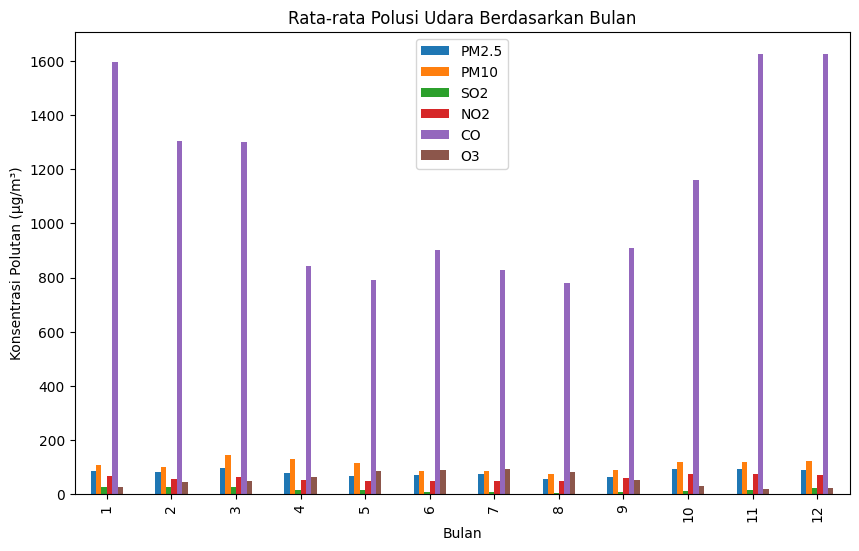

In [24]:
# Grouping berdasarkan tahun
monthly_pollution = df.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menampilkan hasil rata-rata polusi udara per bulan
print(monthly_pollution)

# Visualisasi pola polusi udara per bulan
monthly_pollution.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Polusi Udara Berdasarkan Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Bulan')
plt.show()

          PM2.5        PM10        SO2        NO2           CO         O3
year                                                                     
2013  80.459423  111.640114  19.970371  63.137587  1113.021446  46.251400
2014  85.391134  118.458710  17.394235  62.784810  1110.981735  47.723858
2015  77.405582  108.062078  13.208761  60.329914  1223.584475  61.104532
2016  71.196304   92.187785  10.272484  48.227630  1077.248406  59.855988
2017  83.370056   99.873234  18.824859  65.413489  1300.423729  47.436088


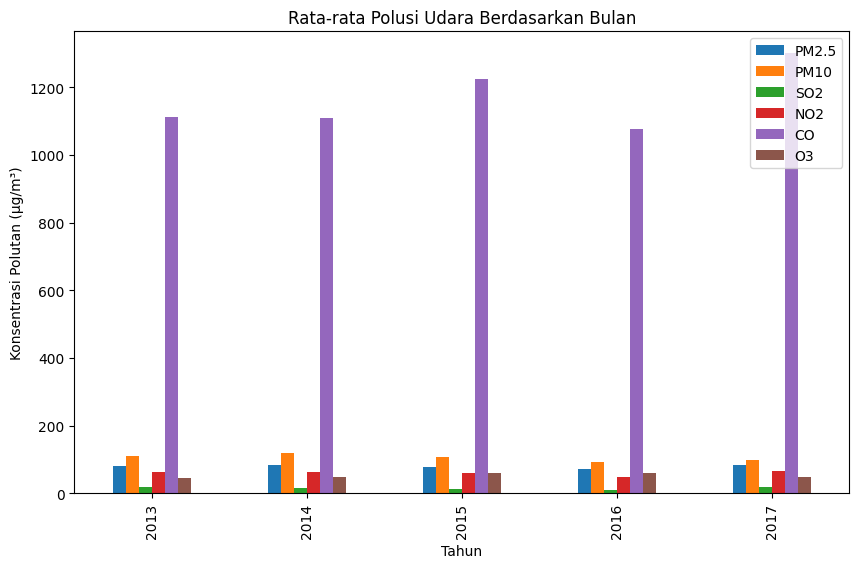

In [25]:
# Grouping berdasarkan tahun
monthly_pollution = df.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

# Menampilkan hasil rata-rata polusi udara per tahun
print(monthly_pollution)

# Visualisasi pola polusi udara per tahun
monthly_pollution.plot(kind='bar', figsize=(10, 6))
plt.title('Rata-rata Polusi Udara Berdasarkan Bulan')
plt.ylabel('Konsentrasi Polutan (µg/m³)')
plt.xlabel('Tahun')
plt.show()

#### Bagaimana suhu (TEMP), tekanan udara (PRES), dan kelembaban (DEWP) berkorelasi dengan tingkat polutan udara?

<Axes: >

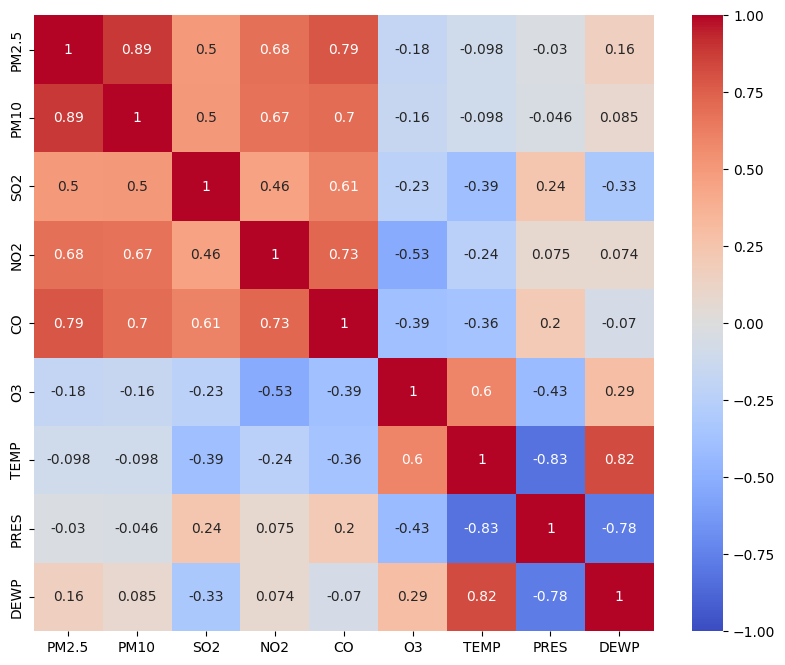

In [26]:
# Menghitung matriks korelasi
corr_matrix = df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP']].corr()

# Membuat heatmap dengan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

#### Insight:
- Secara keseluruhan, baik grafik rata-rata polutan bulanan maupun tahunan menunjukkan bahwa CO adalah polutan utama yang tercatat di stasiun tersebut. Tahun 2017 mencatatkan puncak tertinggi untuk polusi CO, dan pola bulanan menunjukkan bahwa tingkat polutan CO cenderung menurun di pertengahan tahun sebelum meningkat kembali pada akhir tahun. Dengan informasi ini, Anda bisa menjelaskan bahwa polutan CO memerlukan perhatian lebih karena menjadi polutan utama yang mempengaruhi kualitas udara di lokasi tersebut, terutama pada tahun-tahun terakhir dan bulan-bulan tertentu.
- Berdasarkan heatmap korelasi, terlihat bahwa suhu memiliki korelasi positif yang kuat dengan beberapa polutan seperti PM2.5, PM10, SO2, NO2, dan CO. Ini berarti bahwa ketika suhu meningkat, konsentrasi polutan tersebut juga cenderung meningkat, yang mengindikasikan bahwa suhu berperan dalam pembentukan dan penyebaran polutan di udara. Selain itu, tekanan udara memiliki korelasi negatif dengan suhu, yang menunjukkan bahwa ketika tekanan udara tinggi, suhu cenderung lebih rendah. Kelembaban juga menunjukkan korelasi positif dengan suhu, artinya semakin tinggi kelembaban, suhu juga cenderung lebih tinggi. Meskipun demikian, penting diingat bahwa korelasi tidak selalu menunjukkan hubungan sebab-akibat. Analisis lebih lanjut diperlukan untuk memastikan apakah faktor-faktor meteorologi ini benar-benar mempengaruhi konsentrasi polutan atau apakah ada faktor lain yang turut berperan.

## Analisis Lanjutan (Binning)

### Bagaiamana Kualitas Udara setiap tahunya berdasarkan frekuensi PM2.5?

In [27]:
# Batas AQI untuk PM2.5 (contoh dari EPA) (https://www.airnow.gov/aqi/aqi-basics/)
bins = [0, 50, 100, 150, 200, 300, float('inf')]
labels = ['Good', 'Moderate', 'Unhealthy for Sensitive Groups', 'Unhealthy', 'Very Unhealthy', 'Hazardous']

# Mengkategorikan kualitas udara berdasarkan PM2.5
df['PM2.5_AQI'] = pd.cut(df['PM2.5'], bins=bins, labels=labels)

# Melihat hasilnya
print(df[['PM2.5', 'PM2.5_AQI']].sample(5))

       PM2.5       PM2.5_AQI
14060  240.0  Very Unhealthy
23146   35.0            Good
3014    22.0            Good
13406   52.0        Moderate
27724   31.0            Good


In [28]:
df

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,wd,WSPM,PM2.5_AQI
0,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,6,4.15,Good
1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,3,4.15,Good
2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,6,4.15,Good
3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,7,3.10,Good
4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,3,2.00,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,7,2.40,Good
35060,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,14,0.90,Good
35061,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,7,1.10,Good
35062,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,6,1.20,Good


C:\Users\putri\AppData\Local\Temp\ipykernel_16600\1161940509.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  annual_aqi_counts = df.groupby(['year', 'PM2.5_AQI']).size().unstack(fill_value=0)


<Figure size 1200x600 with 0 Axes>

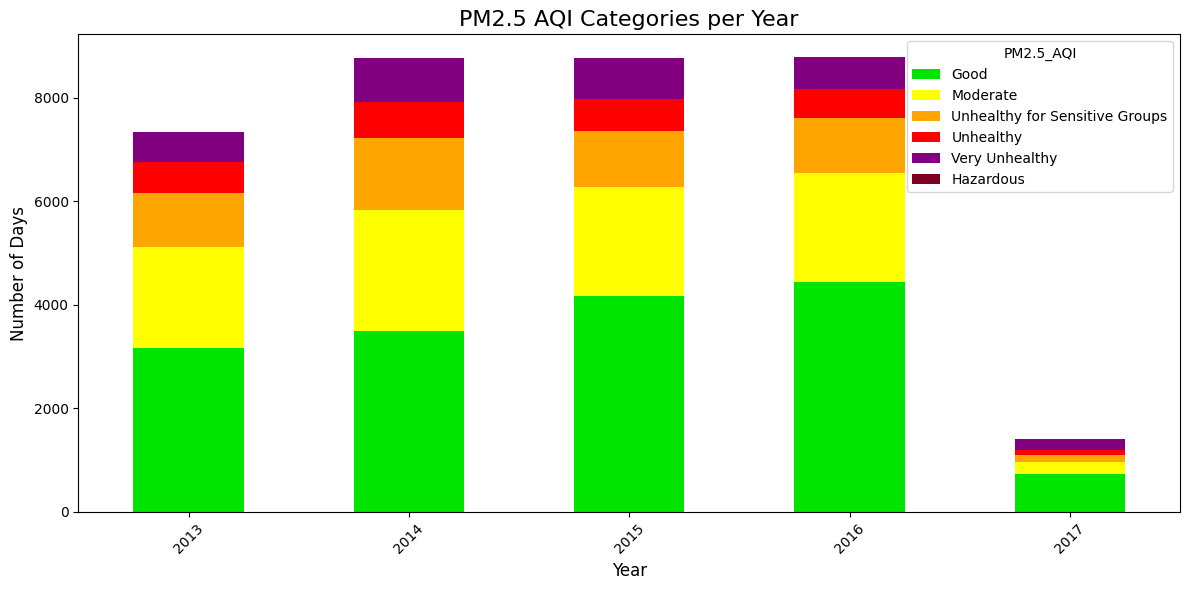

PM2.5_AQI  Good  Moderate  Unhealthy for Sensitive Groups  Unhealthy  \
year                                                                   
2013       3159      1949                            1054        596   
2014       3486      2351                            1388        701   
2015       4164      2113                            1079        622   
2016       4447      2089                            1074        548   
2017        728       229                             136         99   

PM2.5_AQI  Very Unhealthy  Hazardous  
year                                  
2013                  586          0  
2014                  834          0  
2015                  782          0  
2016                  626          0  
2017                  224          0  


In [29]:
# Mengelompokkan berdasarkan tahun dan AQI kategori
annual_aqi_counts = df.groupby(['year', 'PM2.5_AQI']).size().unstack(fill_value=0)

# Menentukan warna sesuai standar AQI
colors = {
    'Good': '#00E400',                       # Hijau
    'Moderate': '#FFFF00',                  # Kuning
    'Unhealthy for Sensitive Groups': '#FFA500',  # Jingga
    'Unhealthy': '#FF0000',                 # Merah
    'Very Unhealthy': '#800080',            # Ungu
    'Hazardous': '#7E0023'                  # Merah Marun
}

# Membuat plot
plt.figure(figsize=(12, 6))
annual_aqi_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in annual_aqi_counts.columns], figsize=(12, 6))

# Menambahkan judul dan label
plt.title('PM2.5 AQI Categories per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Days', fontsize=12)
plt.xticks(rotation=45)

# Menyesuaikan tata letak dan menampilkan plot
plt.tight_layout()
plt.show()

# Print jumlah harian per kategori AQI pertahun
print(annual_aqi_counts)


#### Insight:
- Dari grafik tersebut, dapat dilihat bahwa kualitas udara cenderung berada dalam kategori Moderate dan Unhealthy for Sensitive Groups, menunjukkan bahwa kualitas udara di lokasi ini tidak selalu ideal, terutama bagi kelompok sensitif seperti anak-anak, lansia, atau mereka dengan penyakit pernapasan. Namun, kategori Unhealthy juga muncul di beberapa tahun, yang mengindikasikan bahwa pada tahun-tahun tertentu, polusi udara semakin parah dan menjadi tidak sehat untuk masyarakat umum.
- Tahun 2017 menonjol sebagai tahun dengan jumlah hari Unhealthy tertinggi, mencerminkan peningkatan signifikan dalam polusi udara dibandingkan dengan tahun tahun sebelumnya. Sementara itu, kategori Good tampak jarang terjadi, menunjukkan bahwa kondisi udara baik hanya terjadi pada beberapa hari di sebagian besar tahun.

Secara keseluruhan, grafik ini menggarisbawahi bahwa polusi PM2.5 adalah masalah yang konsisten di lokasi tersebut, dengan fluktuasi kualitas udara dari tahun ke tahun. Tahun-tahun dengan lebih banyak hari di kategori Unhealthy menunjukkan peningkatan polusi udara yang perlu mendapat perhatian khusus.

## Conclusion
- Pola Polusi Udara Sepanjang Tahun: CO muncul sebagai polutan utama yang mempengaruhi kualitas udara di stasiun ini, terutama pada tahun 2017, yang mencatat puncak tertinggi polusi CO. Pola bulanan menunjukkan bahwa tingkat CO menurun pada pertengahan tahun dan meningkat kembali menjelang akhir tahun, sehingga memerlukan perhatian lebih dalam pengendalian polusi.
- Korelasi Faktor Meteorologi dengan Polutan Udara: Berdasarkan heatmap korelasi, suhu memiliki korelasi positif yang kuat dengan polutan seperti PM2.5, PM10, SO2, NO2, dan CO, menunjukkan bahwa peningkatan suhu cenderung diikuti oleh peningkatan konsentrasi polutan. Tekanan udara memiliki korelasi negatif dengan suhu, sedangkan kelembaban memiliki korelasi positif dengan suhu. Hal ini menunjukkan pengaruh kondisi meteorologi terhadap konsentrasi polutan, meskipun perlu analisis lebih lanjut untuk menentukan hubungan kausalitas.
- Kualitas Udara 2013-2017: Kualitas udara di lokasi ini cenderung berada pada kategori Moderate hingga Unhealthy for Sensitive Groups, dengan beberapa hari tercatat dalam kategori Unhealthy. Tahun 2017 menjadi tahun dengan tingkat polusi udara yang paling buruk, terutama dalam hal peningkatan polutan CO, yang menyebabkan lebih banyak hari berada dalam kategori Unhealthy. ini menandakan pentingnya diadakan tindak lanjut yang lebih serius untuk mencegah peningkatan polutan pada tahun-tahun berikutnya.